In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Generate a random dataset
np.random.seed(42)
n_samples = 1000  # Number of samples
n_features = 10   # Number of features

# Generate numerical features
numerical_data = np.random.rand(n_samples, n_features) * 100

# Generate categorical features (converted to numerical later)
categorical_data = np.random.choice(['A', 'B', 'C'], size=(n_samples, 3))

# Generate target variable (Churn: 0 = Retained, 1 = Churned)
y = np.random.choice([0, 1], size=n_samples)

# Create DataFrame
data = pd.DataFrame(numerical_data, columns=[f'Feature_{i}' for i in range(n_features)])
for i in range(3):  # Add categorical columns
    data[f'Cat_Feature_{i}'] = categorical_data[:, i]  # Corrected indentation
data['Churn'] = y  # Add target variable

# Identify categorical and numerical columns
categorical_cols = [col for col in data.columns if 'Cat_Feature' in col]
numerical_cols = [col for col in data.columns if 'Feature_' in col]

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Define feature set (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Normalize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred, target_names=['Retained', 'Churned'])
print("\nClassification Report:")
print(class_report)

Overall Accuracy: 0.50

Confusion Matrix:
[[53 53]
 [47 47]]

Classification Report:
              precision    recall  f1-score   support

    Retained       0.53      0.50      0.51       106
     Churned       0.47      0.50      0.48        94

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



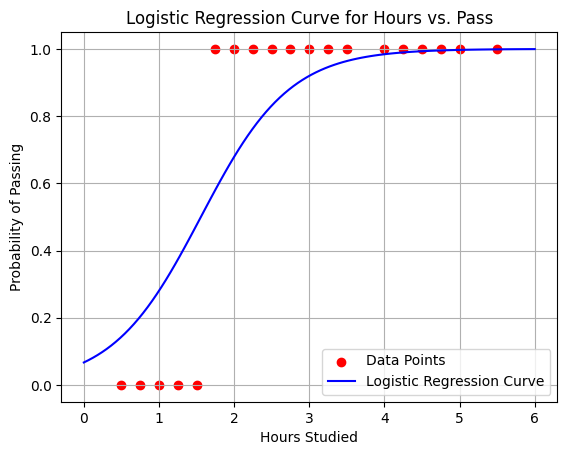

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Given dataset
hours = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 
                  3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]).reshape(-1, 1)
pass_exam = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Train logistic regression model
model = LogisticRegression()
model.fit(hours, pass_exam)

# Generate range of values for plotting the logistic curve
x_values = np.linspace(0, 6, 100).reshape(-1, 1)
y_prob = model.predict_proba(x_values)[:, 1]  # Probability of passing

# Plot the logistic regression curve
plt.scatter(hours, pass_exam, color='red', label='Data Points')
plt.plot(x_values, y_prob, color='blue', label='Logistic Regression Curve')
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression Curve for Hours vs. Pass")
plt.legend()
plt.grid()
plt.show()


In [8]:
import numpy as np

# Data for age and body fat analysis
age = np.array([23, 23, 52, 54, 54, 56, 57, 58, 58, 60, 61])
body_fat = np.array([9.5, 26.5, 34.6, 42.5, 28.8, 33.4, 30.2, 34.1, 32.9, 41.2, 35.7])

# Calculate statistics
age_mean = np.mean(age)
age_median = np.median(age)
age_std = np.std(age)

body_fat_mean = np.mean(body_fat)
body_fat_median = np.median(body_fat)
body_fat_std = np.std(body_fat)

# Calculate Pearson correlation coefficient
correlation = np.corrcoef(age, body_fat)[0, 1]

# Print results
print("Age Statistics:")
print(f"Mean: {age_mean:.2f}, Median: {age_median:.2f}, Standard Deviation: {age_std:.2f}")

print("\nBody Fat Statistics:")
print(f"Mean: {body_fat_mean:.2f}, Median: {body_fat_median:.2f}, Standard Deviation: {body_fat_std:.2f}")

print("\nPearson Correlation Coefficient:")
print(f"Correlation: {correlation:.2f}")

# Interpret the correlation
if correlation > 0:
    print("The variables are positively correlated.")
elif correlation < 0:
    print("The variables are negatively correlated.")
else:
    print("There is no correlation between the variables.")

Age Statistics:
Mean: 50.55, Median: 56.00, Standard Deviation: 13.23

Body Fat Statistics:
Mean: 31.76, Median: 33.40, Standard Deviation: 8.38

Pearson Correlation Coefficient:
Correlation: 0.77
The variables are positively correlated.
